First Install all dependencies

In [6]:
pip install numpy rembg pillow torch diffusers

Importing all the modules

In [7]:
import numpy as np
import rembg
from PIL import Image
import PIL.ImageOps

import torch
# print(torch.cuda.is_available())

from diffusers import StableDiffusionInpaintPipeline

In [8]:
torch.cuda.is_available()

True

Connecting the drive

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Removing background and Generating the mask

In [10]:
input_image_path = r"drive/MyDrive/Colab Notebooks/AI-Photoshoot/sample_ip.png"
input_image = Image.open(input_image_path)
object_image = rembg.remove(input_image,bgcolor=[255,255,255,255]).convert("RGB")
object_mask = rembg.remove(input_image,only_mask=True).convert("RGB")
mask=PIL.ImageOps.invert(object_mask)
data = np.array(mask)
r2, g2, b2 = 0,0,0
thres=200
red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
greymask = (red<thres) & (green<thres) & (blue<thres)
data[:,:,:3][greymask] = [r2, g2, b2]
accuratemask = Image.fromarray(data)

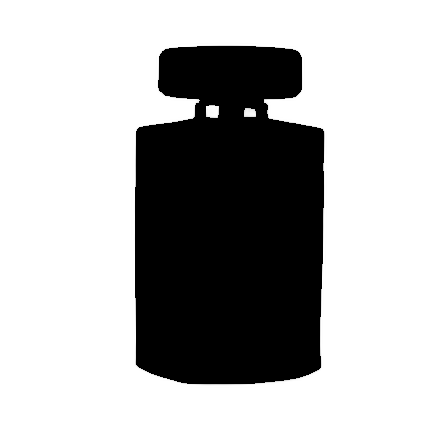

In [11]:
accuratemask

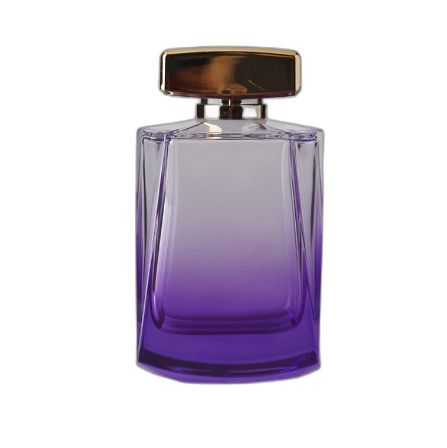

In [12]:
object_image

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


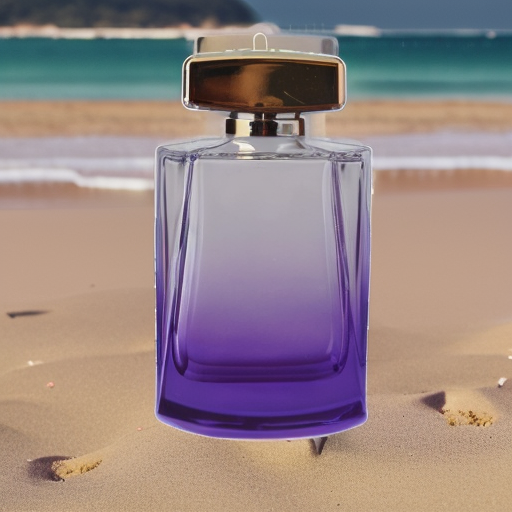

In [13]:
#Model 1

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "yahoo-inc/photo-background-generation",
    torch_dtype=torch.float16,
)
pipe.to("cuda")
prompt = "Product on a beach"
# Mask: black = retain & white = inpaint
AIimage = pipe(prompt=prompt, image=object_image, mask_image=accuratemask).images[0]
AIimage

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

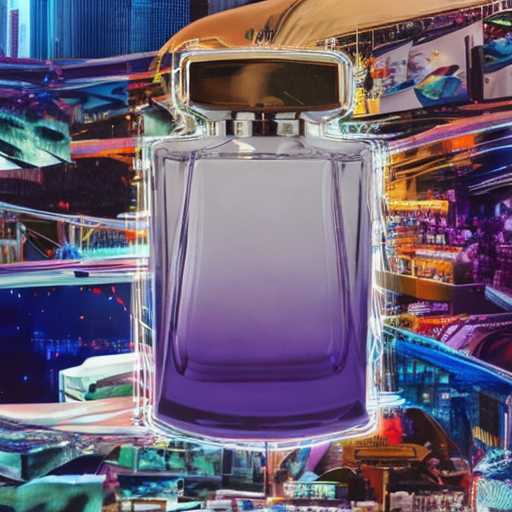

In [14]:
#Model 2

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    torch_dtype=torch.float16,
)
pipe.to("cuda")
prompt = "Contextually appropriate background to advertise a product"
# Mask: black = retain & white = inpaint
AIimage = pipe(prompt=prompt, image=object_image, mask_image=accuratemask).images[0]
AIimage